# Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

# Import necessary Python Modules

In [173]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION

In [174]:
#loadindg the data set
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [175]:
#print first 5 rows of the dataset
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [176]:
#Data Summary
df.shape

(4177, 9)

In [177]:
#checking null values in dataset
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [178]:
#find duplicates
df.duplicated().sum()

0

In [179]:
#CHECKING THE DATATYPES IN COLUMNS
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [180]:
#count of each sex 
print(df['Sex'].value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [181]:
#Encoding all the 3 lables into values of 0,1,& 2 as follows
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df['Sex'])
pd.Series(df2)
df['Sex']=df2
#i = 0, F=1, M=2

In [182]:
#printing the first 5 rows of the dataset after label encoding
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# The Target column = Rings; is a continous data and hence this is a Regression problem.

In [184]:
#CHECKING THE DATATYPES IN COLUMNS
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [185]:
#count of each value
print(df['Rings'].value_counts())

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64


In [186]:
#Checking Correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

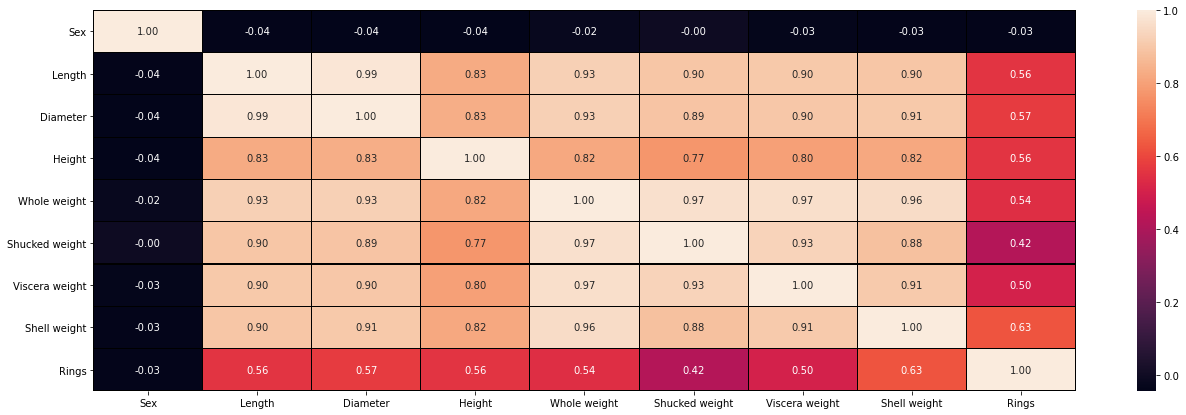

In [187]:
#Visualisation of the correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [188]:
#Correlation with the target column
corr_mat=df.corr()
corr_mat['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

In [189]:
#columns 
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [190]:
#Shape of the dataset (only columns)
df.shape[1]

9

In [191]:
#VIF 
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif["features"]=df.columns
vif.sort_values(by=['VIF'], ascending=False)

,VIF,features
2,755.416018,Diameter
1,702.347884,Length
4,436.141083,Whole weight
5,117.686245,Shucked weight
7,82.562895,Shell weight
6,64.740171,Viscera weight
3,43.004758,Height
8,21.652131,Rings
0,2.563825,Sex


In [1]:
#Diameter, Length, Whole weight, Shell weight, Viscrra weight & Height have high correlation values
#Dropping Diameter and checking the correlation values

In [192]:
#Dropping the highly correlated column
data = df.drop(columns='Diameter')

In [193]:
#VIF 
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif["features"]=data.columns
vif.sort_values(by=['VIF'], ascending=False)

,VIF,features
3,436.115776,Whole weight
4,117.646530,Shucked weight
6,81.696701,Shell weight
5,64.703005,Viscera weight
1,57.965510,Length
2,42.552906,Height
7,21.471718,Rings
0,2.562454,Sex


In [ ]:
#Whole weight, Shucked weight, Shell weight, Viscera weight have high correlation values.
#Dropping Whole weight and checking the correlation values

In [194]:
data = data.drop(columns='Whole weight')

In [195]:
#VIF 
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif["features"]=data.columns
#vif.sort_values(by=['VIF'], ascending=False)

In [196]:
#df = df.drop(columns =['Diameter'])

In [197]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# DATA VISUALISATION

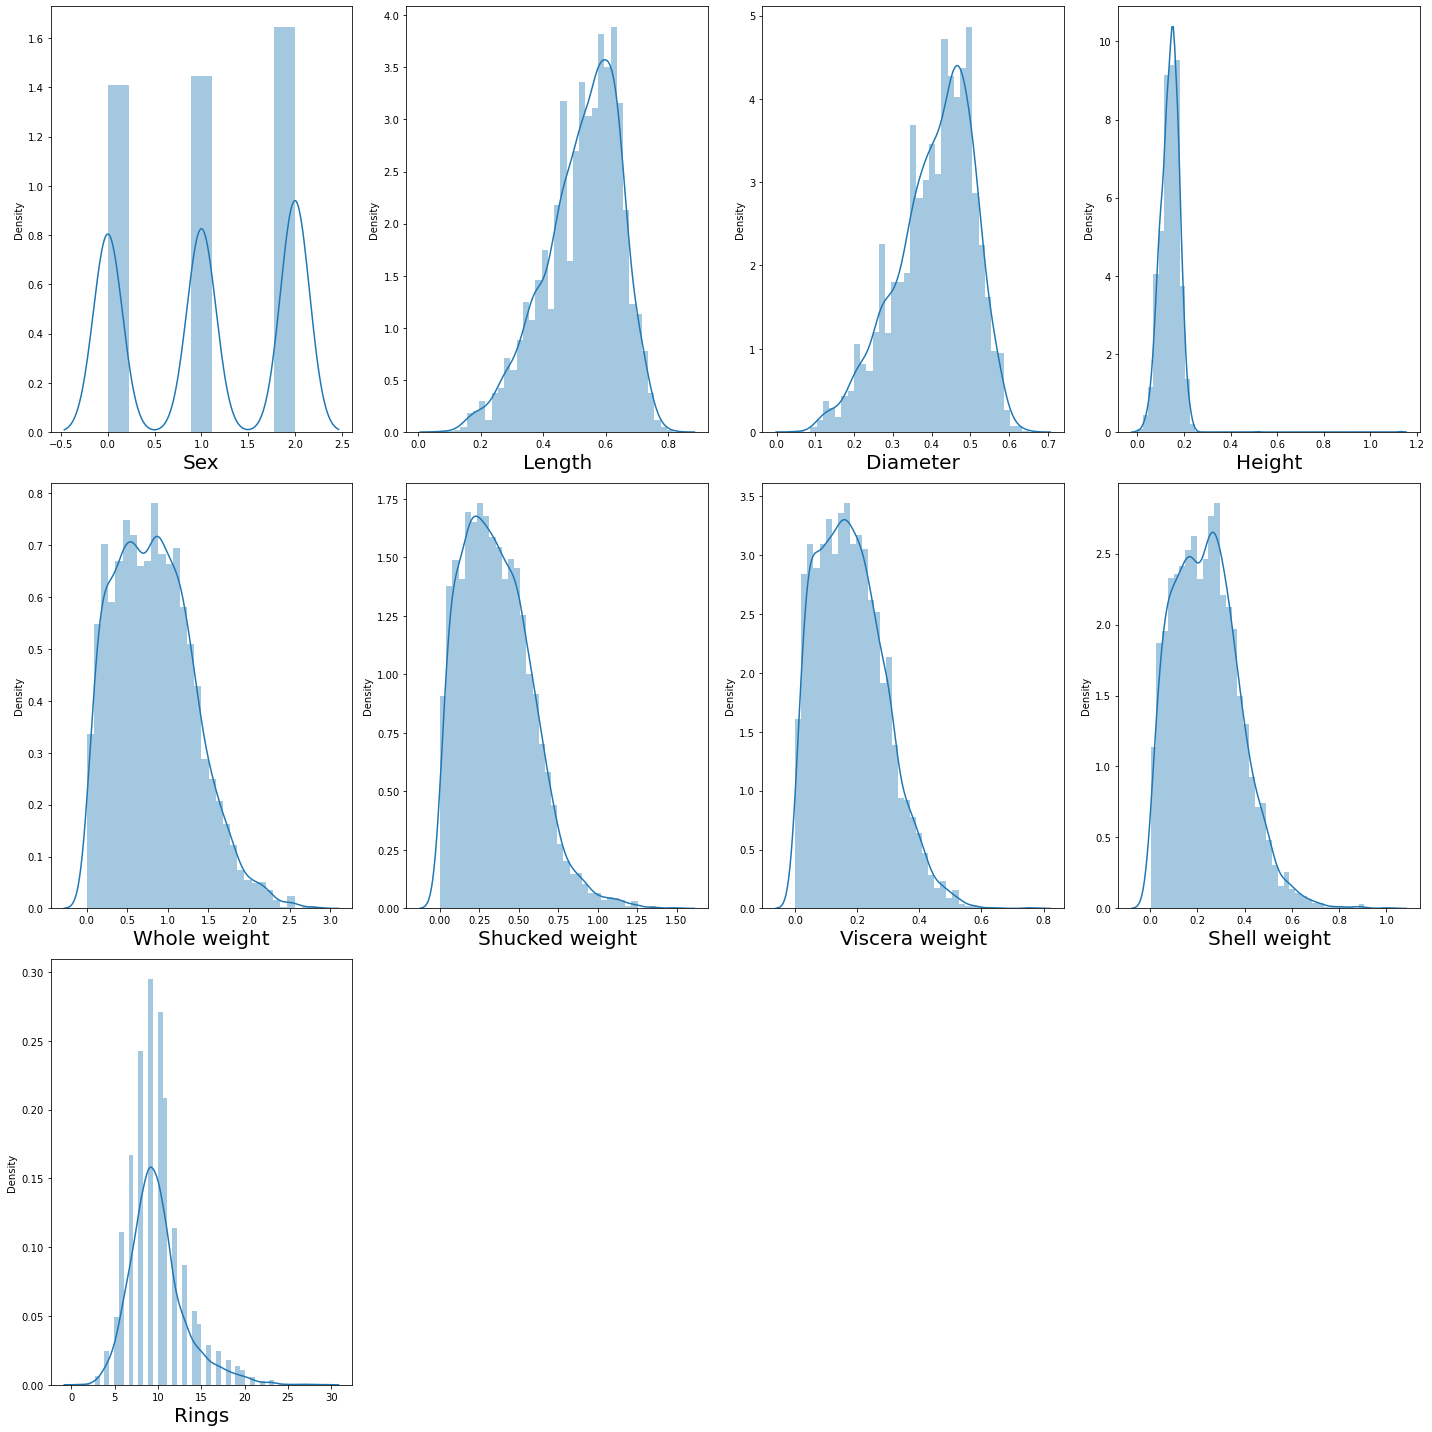

In [198]:
#Checking the skewness of the data (Visually) using DISTPLOT
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [199]:
#copying original copy of Rings column
quality_column = df['Rings']
#checking skewness 
df.skew().sort_values(ascending=False)

Height            3.128817
Rings             1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.098155
Diameter         -0.609198
Length           -0.639873
dtype: float64

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [200]:
#We can see skewness in most of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
df_new = power_transform(df)
df=pd.DataFrame(df_new,columns=df.columns)
df.skew().sort_values(ascending=False) #validating that the skewness is removed

Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Rings             0.004429
Whole weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Height           -0.115483
Sex              -0.176442
dtype: float64

In [202]:
df['Rings'] = data['Rings']

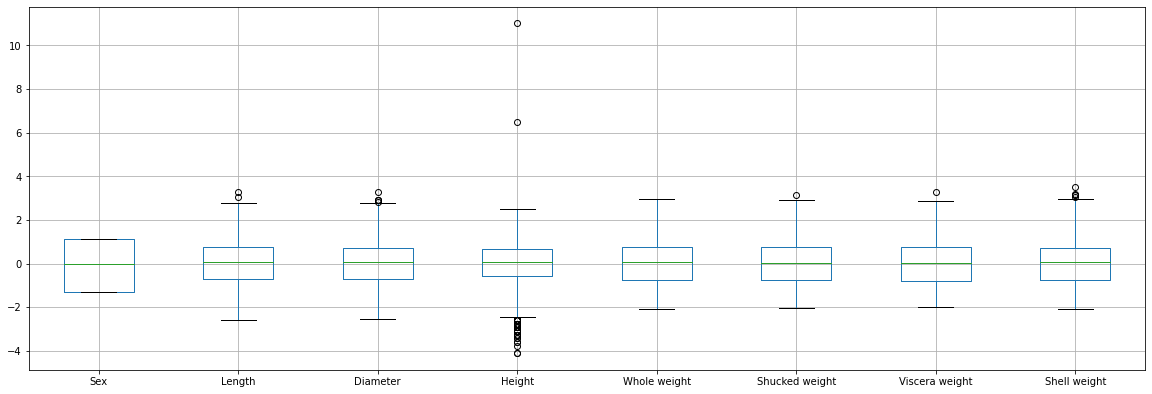

In [203]:
#checking outliers using BOXPLOT
df.iloc[:,:-1].boxplot(figsize=[20,8]) 
plt.subplots_adjust(bottom=0.25)
plt.show()

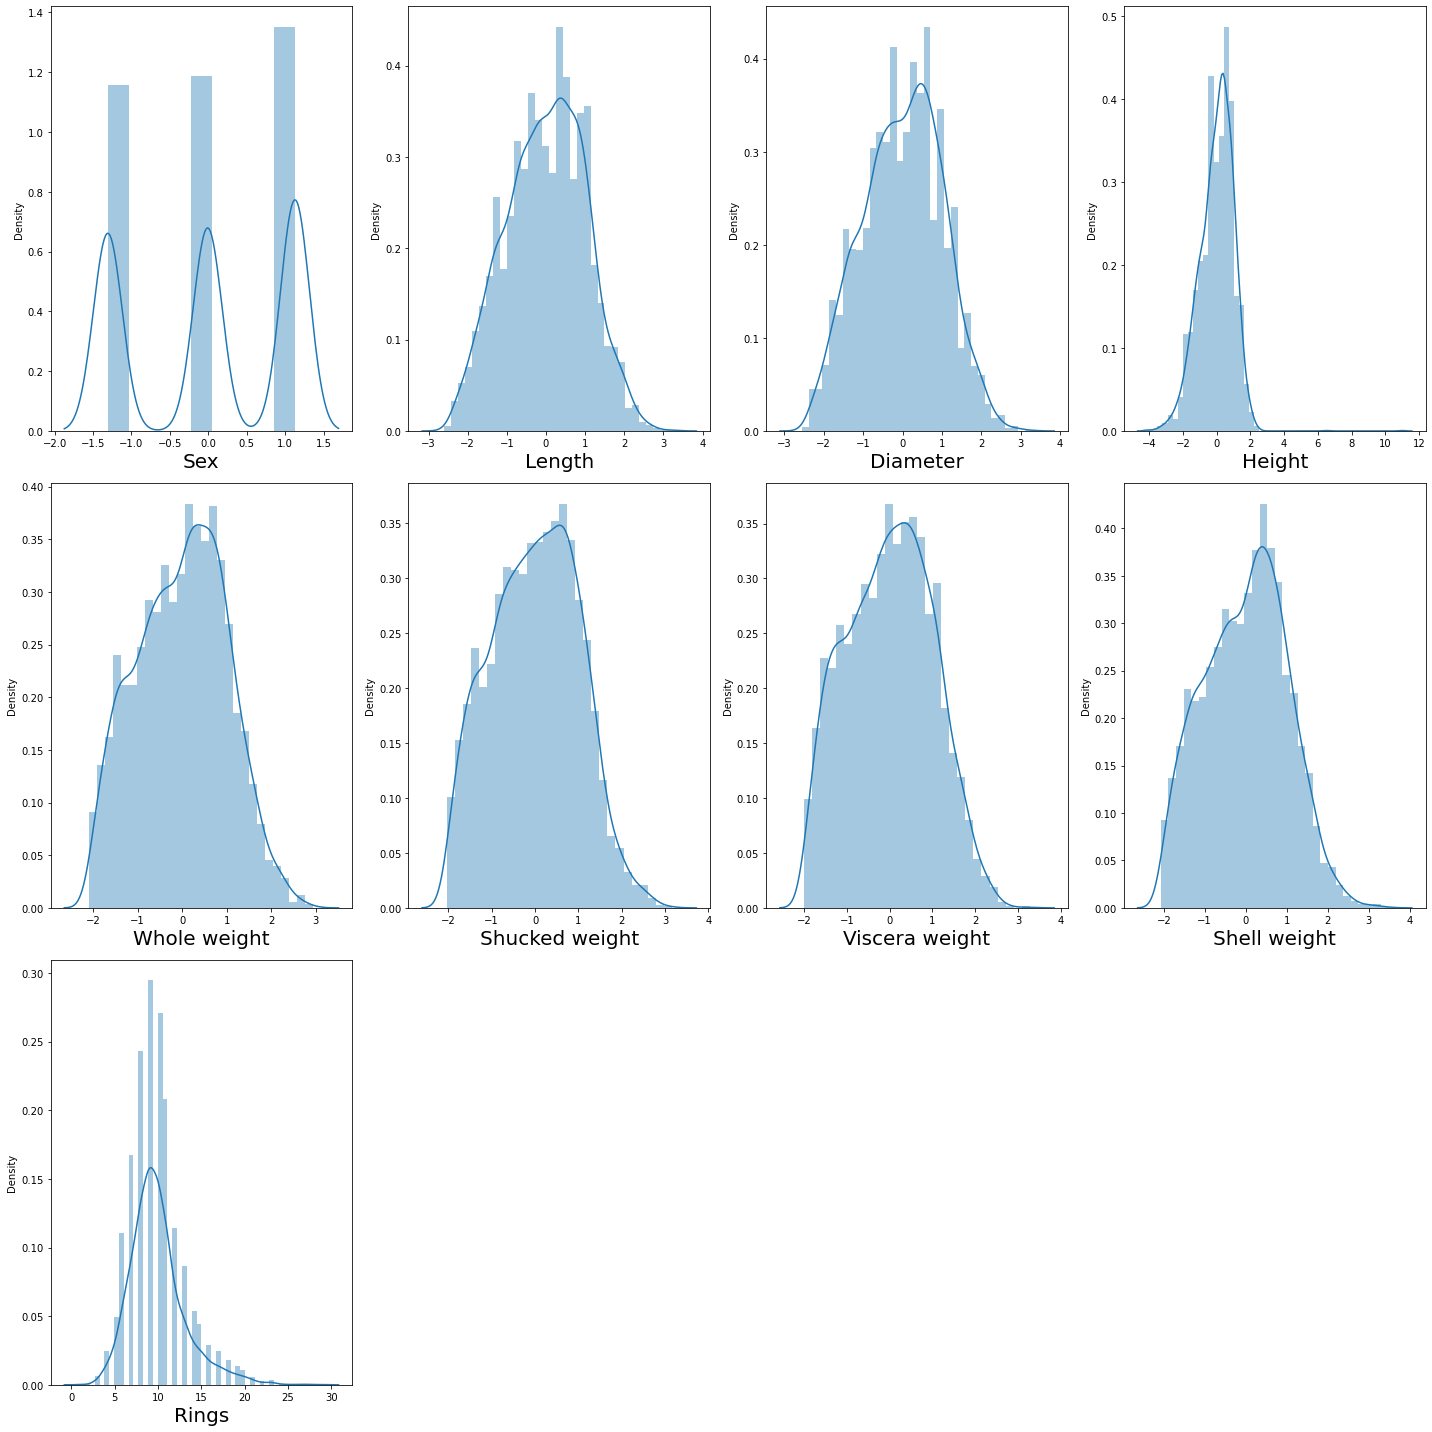

In [204]:
#checking skewness using DISTPLOT
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [205]:
#removing outliers using IQR
from scipy.stats import iqr
#find the IQR
#1st Quantile
q1=df.quantile(0.25)
#3rd Quantile
q3=df.quantile(0.75)

iqr = q3-q1

In [206]:
#feature = Height (outlier in lower side)
Height_low=(q1.Height-(1.5*iqr.Height))
index=np.where(df['Height']<Height_low)
df=df.drop(df.index[index])
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,1.127072,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,15
1,1,1.127072,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,7
2,2,-1.307935,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,9
3,3,1.127072,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,10
4,4,-0.009459,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,7
...,...,...,...,...,...,...,...,...,...,...
4124,4172,-1.307935,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,11
4125,4173,1.127072,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,10
4126,4174,1.127072,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,9
4127,4175,-1.307935,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,10


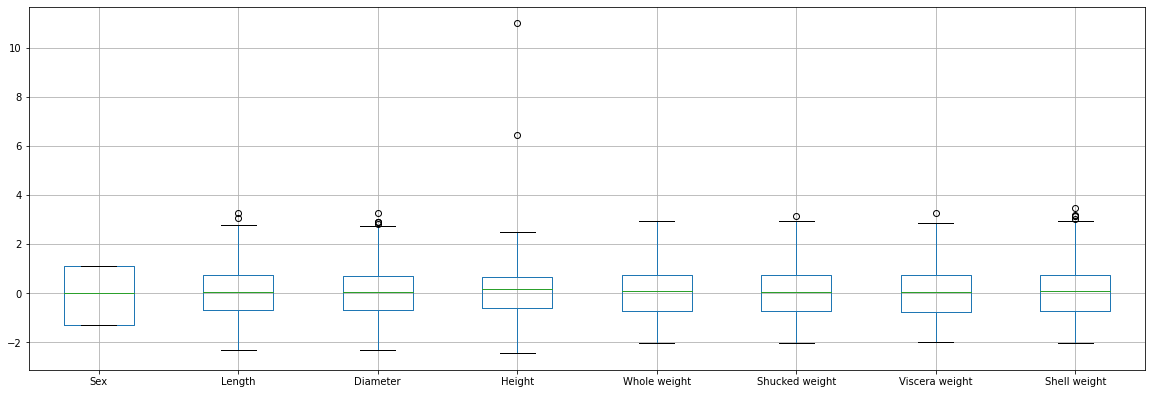

In [207]:
#checking outliers using BOXPLOT
df.iloc[:,:-1].boxplot(figsize=[20,8]) #plotting boxplot for first 30 columns 
plt.subplots_adjust(bottom=0.25)
plt.show()

In [208]:
df.shape

(4129, 9)

In [209]:
df.isnull().sum().sum()

0

# DIVIDE DATA INTO FEATURES & LABEL

In [210]:
#Divide data set into features & label
y=df['Rings']
X=df.drop(columns=['Rings'])

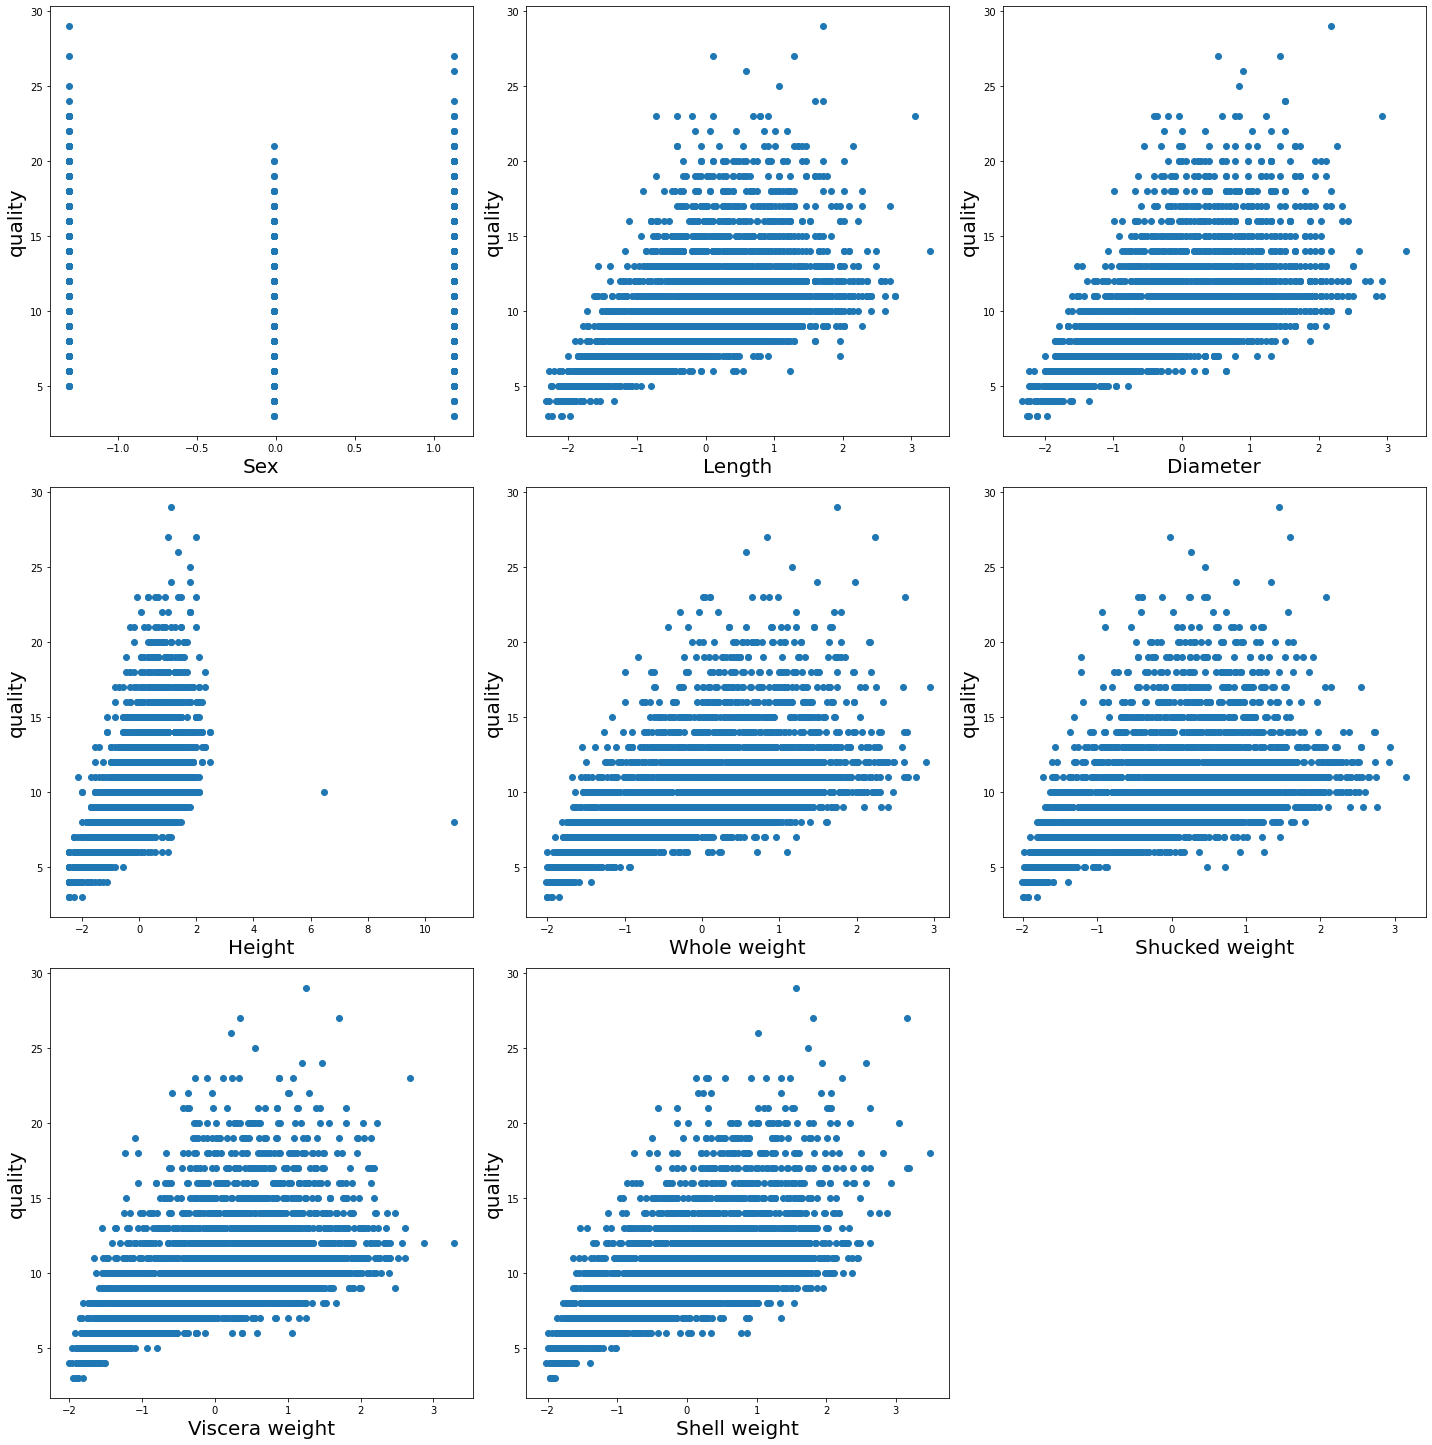

In [211]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=15: #double the features
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('quality', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [212]:
#Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [213]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
for i in range(0,100):
	x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=i)
	lr.fit(x_train,y_train)
	y_pred_train=lr.predict(x_train)
	y_pred=lr.predict(x_test)
	print(f"At random state {i},the training accuracy is:- {r2_score(y_train,y_pred_train)}")
	print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,y_pred)}")
	print("\n")

At random state 0,the training accuracy is:- 0.5457732889941171
At random state 0,the testing accuracy is:- 0.48528371064514253


At random state 1,the training accuracy is:- 0.532021173545534
At random state 1,the testing accuracy is:- 0.5349710465695354


At random state 2,the training accuracy is:- 0.5371131391555533
At random state 2,the testing accuracy is:- 0.5141251677989023


At random state 3,the training accuracy is:- 0.5431175984782294
At random state 3,the testing accuracy is:- 0.48950829029056897


At random state 4,the training accuracy is:- 0.5484642272494509
At random state 4,the testing accuracy is:- 0.4542046342837127


At random state 5,the training accuracy is:- 0.5445587767269219
At random state 5,the testing accuracy is:- 0.4793198919139663


At random state 6,the training accuracy is:- 0.5387759305416799
At random state 6,the testing accuracy is:- 0.5100970520234336


At random state 7,the training accuracy is:- 0.5279901055400413
At random state 7,the testing ac

At random state 83,the training accuracy is:- 0.5334531423938094
At random state 83,the testing accuracy is:- 0.5285389736842139


At random state 84,the training accuracy is:- 0.5264072012484358
At random state 84,the testing accuracy is:- 0.5629225971503127


At random state 85,the training accuracy is:- 0.5315446687242158
At random state 85,the testing accuracy is:- 0.5384225630141852


At random state 86,the training accuracy is:- 0.5333092709301752
At random state 86,the testing accuracy is:- 0.5273080024634584


At random state 87,the training accuracy is:- 0.5306910330356934
At random state 87,the testing accuracy is:- 0.5379072642497555


At random state 88,the training accuracy is:- 0.5364829241147542
At random state 88,the testing accuracy is:- 0.5124211017464317


At random state 89,the training accuracy is:- 0.5304424877460172
At random state 89,the testing accuracy is:- 0.5430837494186113


At random state 90,the training accuracy is:- 0.5377218899921533
At random state 90

In [214]:
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred)*100)


51.7644508932314


# USING REGRESSION MODELS & FINDING BEST FIT MODEL

In [215]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Score", r2_score(y_test,y_pred_dt)*100)

Score 8.00033290624067


In [216]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score", r2_score(y_test,y_pred_rf)*100)

Score 37.35341593655054


In [217]:
#SVR
from sklearn.svm import SVR
svc = SVR()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Score", r2_score(y_test,y_pred_svc)*100)

Score 52.6509481183809


In [218]:
#CROSS-VALIDATION OF THE MODEL
Train_accuracy=r2_score(y_train,y_pred_train)
Test_accuracy=r2_score(y_test,y_pred)


In [219]:
from sklearn.model_selection import  cross_val_score
cv_score=cross_val_score(lr,X,y,cv=5)
cv_mean=cv_score.mean()
print(f"At cross fold 5 the cv score is {cv_mean} and accuracy score for training is {Train_accuracy*100} and accuracy for testing is {Test_accuracy*100}")
print("\n")

At cross fold 5 the cv score is 0.41576052327615914 and accuracy score for training is -49.565616915064666 and accuracy for testing is 51.7644508932314




In [220]:
#Here, we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

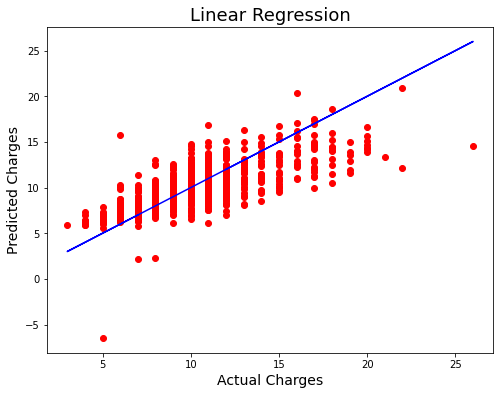

In [221]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [222]:
#Best fit line is covering most of the datapoints which shows good fit of our model

In [223]:
#REGULARIZATION
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [224]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001, .001, .01, .1, 1, 2, 4, 6, 8, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.001, 'random_state': 0}


In [225]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss
cv_score=cross_val_score(ls,X_scaled,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

41.587190716237934

## ENSEMBLE TECHNIQUE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [226]:
parameters = {'criterion':['mse','mae'], 'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'mae', 'max_features': 'log2'}


In [227]:
rf = RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9257749403669904

In [228]:
y_pred=rf.predict(x_test)
rfs = r2_score(y_test,y_pred)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,X_scaled,y,cv=5)
rfc=rfscore.mean()
print("Cross val score:",rfc*100)


r2_score: 55.9884192347883
Cross val score: 43.11688442874939


# SAVING THE MODEL

In [ ]:
#SAVING THE MODEL IN PICKLE FORMAT
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
#saving the model to the local file system
filename = 'abalone.pickle'
pickle.dump(rf, open(filename, 'wb')
